In [1]:
# This is the generation function for er_correlated graph
# Only for showing results through nbviewer
from graspy.simulations import er_np
from scipy.stats import bernoulli
import copy

def er_corr(n, p, rho):
        G1 = er_np(n, p)
        origin_G1 = copy.deepcopy(G1)
        sumG1 = 0
        for i in range(n):
            for j in range(n):
                sumG1 += origin_G1[i][j]

        for i in range(n):
            for j in range(n):
                if G1[i][j] == 1:
                    G1[i][j] = bernoulli.rvs(p+rho*(1-p), size=1, loc=0)
                else:
                    G1[i][j] = bernoulli.rvs(p*(1-rho), size=1, loc=0)
        sumG2 = 0
        for i in range(n):
            for j in range(n):
                sumG2 += G1[i][j]

        return origin_G1, G1

In [2]:
import numpy as np
# from er_corr import er_corr


def test_er_corr(n, p, rho=0.2):
    """
    Test the generation function of correlated distribution: er_corr
    Show the probabilities of graph2 while elements in graph1 is 1 and 0
    Parameter
    ---------
    n: dimension if the matrix
    p: a real number in the interval (0,1)
        the probability of G1 with the Bernoulli distribution
        also a parameter for generate G2
    rho: a real number in the interval [0,1]
        another parameter to definite the correlation between graph1 and graph2
    Returns
    -------
    real_prob1: the probability of 1 in graph2 when the element of the same place is 1
    real_prob2: the probability of 1 in graph2 when the element of the same place is 0
    Examples
    --------
    >>> test_er_corr(100, 0.5, 0.3)
    >>> print(G1)
    >>> print(G2)
    0.6501824077827321
    0.3505724437425978
    To see the mean variance of k times between real and expected correlations:
    >>> g = 20
    >>> total = 0
    >>> for i in range(g):
    >>>     pb1, pb2 = test_er_corr(100, 0.5, 0.3)
    >>>     total += var
    >>> print(total/g)
    0.008869200017044656
    """
    global exp_prob1, exp_prob2, real_prob1, real_prob2, var

    prob1 = 0
    prob2 = 0
    origin_G1, G1 = er_corr(n, p, rho)
    for i in range(n):
        for j in range(n):
            if origin_G1[i][j] == 1 and G1[i][j] == 1:
                prob1 += 1
            if origin_G1[i][j] == 0 and G1[i][j] == 1:
                prob2 += 1
    exp_prob1 = p + rho * (1 - p)
    real_prob1 = prob1/(origin_G1.mean()*n**2)
    exp_prob2 = p*(1-rho)
    real_prob2 = prob2 / ((1-origin_G1.mean()) * n ** 2)
    var = np.sqrt((exp_prob1 - real_prob1)**2 + (exp_prob2 - real_prob2)**2)
    var = float(var)
    return real_prob1, real_prob2

In [3]:
if __name__ == '__main__':
    g = 20
    total = 0
    for i in range(g):
        pb1, pb2 = test_er_corr(100, 0.5, 0.3)
        total += var
    print(total/g)

0.007909863022111918


In [5]:
#from er_corr1 import er_corr
import numpy as np
import matplotlib.pyplot as plt
import copy


def figure_p(n, p, rho):
    global origin_G1, G1, m_org

    G1, G2 = er_corr(10, 0.5, 0.3)
    origin_G1, G1 = er_corr(n, p, rho)
    # m_org = origin_G1.mean()
    m_gen = float(G1.mean())
    return m_gen



In [ ]:
import numpy as np # fundamental package for scientific computing
import matplotlib.pyplot as plt
%matplotlib inline 

n = 600
prob = []
for i in range(n):
    prob.append(figure_p(100, 0.5, 0.3))
    prob.sort()
#print(prob)
plt.draw()
plt.plot(prob)

In [20]:
print(np.median(prob))
print(np.mean(prob))

0.49824999999999997
0.4981905


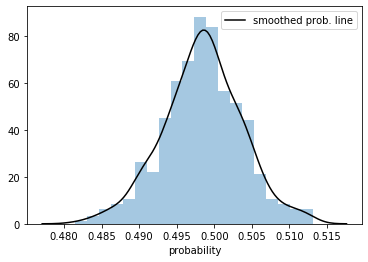

In [7]:
import seaborn as sns
%matplotlib inline

sns.distplot(prob,axlabel='probability', kde_kws={"label":"smoothed prob. line","color":"k"})